# Workout & Fitness Tracker

Muh Amri Sidiq

## Introduction

In recent years, technology has transformed the fitness industry, enabling individuals to track their workouts with greater precision and effectiveness. However, many existing fitness trackers focus on basic metrics such as step count, calories burned, and heart rate, without providing deeper insights into workout efficiency. To bridge this gap, we introduce an advanced Workout & Fitness Tracker powered by machine learning, utilizing ensemble voting and ensemble stacking techniques to enhance prediction accuracy and decision-making.

Our primary target, Workout Efficiency, is a key metric that evaluates how effectively an individual performs exercises based on multiple factors, including movement patterns, heart rate variability, recovery time, and exercise intensity. By leveraging ensemble methods, we aim to improve the reliability of predictions and provide users with actionable insights to optimize their training sessions.

The system employs ensemble voting, which combines multiple models (e.g., decision trees, gradient boosting, and random forest) to make collective predictions, reducing the impact of individual model biases. Additionally, ensemble stacking is utilized to further refine the predictions by integrating multiple base models and a meta-learner, ensuring that workout efficiency assessments are as accurate as possible.

By implementing these machine learning techniques, our Workout & Fitness Tracker not only enhances performance monitoring but also offers personalized recommendations for improved training routines. Whether for athletes, fitness enthusiasts, or beginners, this system provides data-driven insights that help users achieve their fitness goals efficiently.

## Install Library

In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

## Load Data

In [24]:
df = pd.read_csv("workout_fitness_tracker_data.csv")

Check preview data

In [18]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


Check missing values

In [4]:
print(df.isnull().sum())

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64


No have missing values, next step check duplicated data

In [5]:
print(df.duplicated().sum())

0


No have duplicated data, and next step is deffine `Workout Efficiency` in this bellow

In [25]:
df['Workout Efficiency'] = df['Calories Burned'] / (df['Workout Duration (mins)']*60)

Use `describe()` to show summary statistic

In [7]:
df.describe()

,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Workout Efficiency
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.0,10000.000000
mean,5000.50000,38.390100,174.275100,84.903000,64.464800,552.100800,129.526700,10455.496600,7.820745,6.982820,1.900000e+00,2748.428800,69.486500,3.840000e+01,28.5,0.213678
std,2886.89568,12.171637,14.440986,20.189937,31.814946,260.629908,28.874152,5486.423716,4.159148,1.708738,2.220557e-16,717.109026,11.566763,7.105783e-15,0.0,0.218972
min,1.00000,18.000000,150.000000,50.000000,10.000000,100.000000,80.000000,1000.000000,0.500000,4.000000,1.900000e+00,1500.000000,50.000000,3.840000e+01,28.5,0.014006
25%,2500.75000,28.000000,162.000000,67.000000,37.000000,325.000000,105.000000,5673.000000,4.240000,5.500000,1.900000e+00,2124.000000,60.000000,3.840000e+01,28.5,0.083871
50%,5000.50000,38.000000,174.000000,85.000000,64.000000,554.000000,130.000000,10434.500000,7.850000,7.000000,1.900000e+00,2753.000000,69.000000,3.840000e+01,28.5,0.144059
75%,7500.25000,49.000000,187.000000,102.000000,92.000000,776.000000,155.000000,15211.000000,11.410000,8.400000,1.900000e+00,3360.000000,80.000000,3.840000e+01,28.5,0.250542
max,10000.00000,59.000000,199.000000,119.000000,119.000000,999.000000,179.000000,19998.000000,15.000000,10.000000,1.900000e+00,3999.000000,89.000000,3.840000e+01,28.5,1.645000


From comand prompt above `Water Intake (liters)`, `VO2Max` and `Body Fat (%)` in every row have same value, and this bellow chack structure data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

From above command we have 10000 row and 21 column, with expalin this bellow:

 - `User ID`                : Unique identifier for each user
 - `Age`                    : User’s age (18-60 years)
 - `Gender`                 : Male, Female, Other
 - `Height (cm)`            : User’s height in centimeters
 - `Weight (kg)`            : User’s weight in kilograms
 - `Workout Type`           : Type of workout (Cardio, Strength, Yoga, HIIT, Cycling, Running)
 - `Workout Duration (mins)`: Total time spent in workout
 - `Calories Burned`    	: Total calories burned during workout
 - `Heart Rate (bpm)`	    : Average heart rate during the workout
 - `Steps Taken`        	: Number of steps recorded (for walking/running workouts)
 - `Distance (km)`      	: Distance covered in kilometers
 - `Workout Intensity`	    : Low, Medium, High
 - `Sleep Hours`        	: Hours of sleep before the workout
 - `Water Intake (liters)`	: Water consumed in liters
 - `Daily Calories Intake`	    : Total calories consumed in a day
 - `Resting Heart Rate (bpm)`   : Heart rate when at rest
 - `VO2 Max`	:Oxygen consumption capacity (indicator of cardiovascular fitness)
 - `Body Fat (%)`	:Estimated body fat percentage
 - `Mood Before Workout`	:Mood before the workout (Happy, Neutral, Tired, Stressed)
 - `Mood After Workout`	:Mood after the workout (Energized, Neutral, Fatigued)


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data science workflow that involves analyzing and summarizing datasets to uncover patterns, relationships, and anomalies before building models. It helps data scientists and analysts understand the structure and characteristics of the data, identify missing values, detect outliers, and determine the most relevant features for modeling

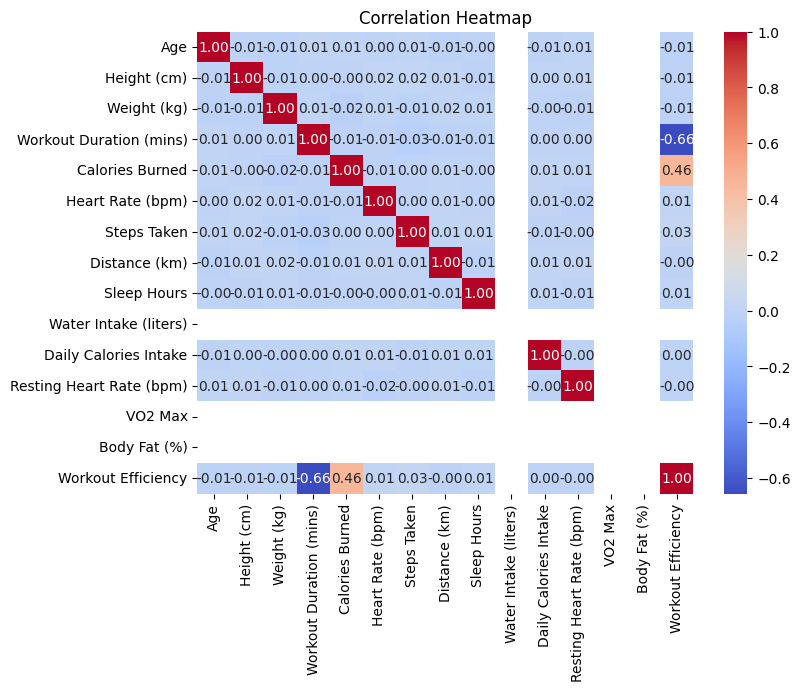

In [10]:
correlation_matrix = df[['Age', 'Height (cm)', 'Weight (kg)', 'Workout Duration (mins)', 'Calories Burned',
                         'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Water Intake (liters)',
                         'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Workout Efficiency']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insight: From heatmap above `Workout Duration (mins)` and `Calories Burned` have correlation higher with `Workout Efficiency` than other

C:\Users\amris\AppData\Local\Temp\ipykernel_22224\2628476625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Workout Type', y='Workout Efficiency', data=df, palette='Set2')


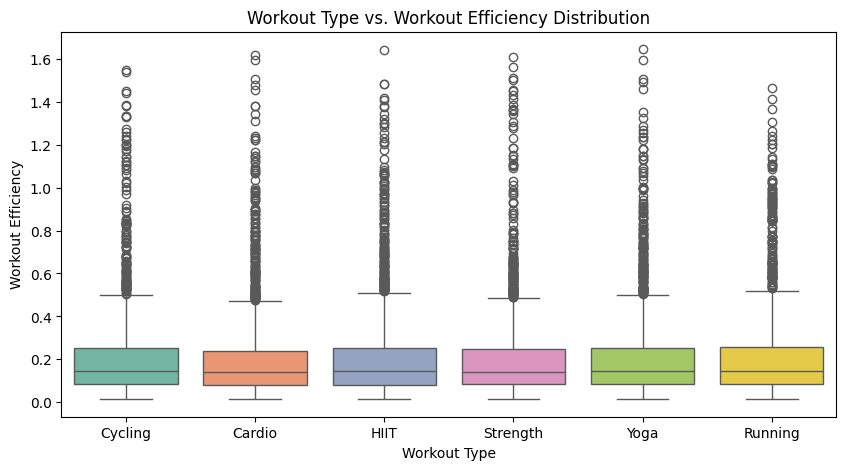

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Workout Type', y='Workout Efficiency', data=df, palette='Set2')
plt.xlabel('Workout Type')
plt.ylabel('Workout Efficiency')
plt.title('Workout Type vs. Workout Efficiency Distribution')
plt.show()

Insight: all `Workout Type` have outliers and HIT and Yoga have higher than other

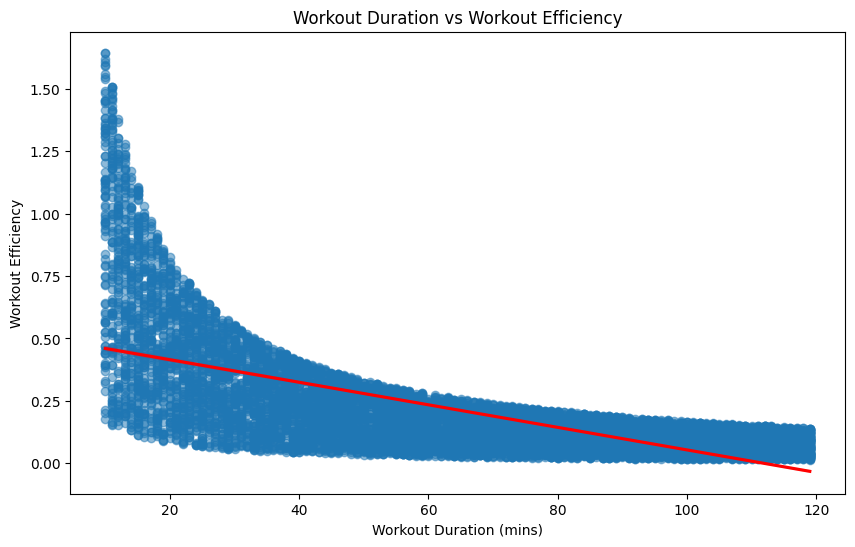

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Workout Duration (mins)', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Workout Duration vs Workout Efficiency')
plt.xlabel('Workout Duration (mins)')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Workout Duration (mins)` have correlation with `Workout Efficiency`

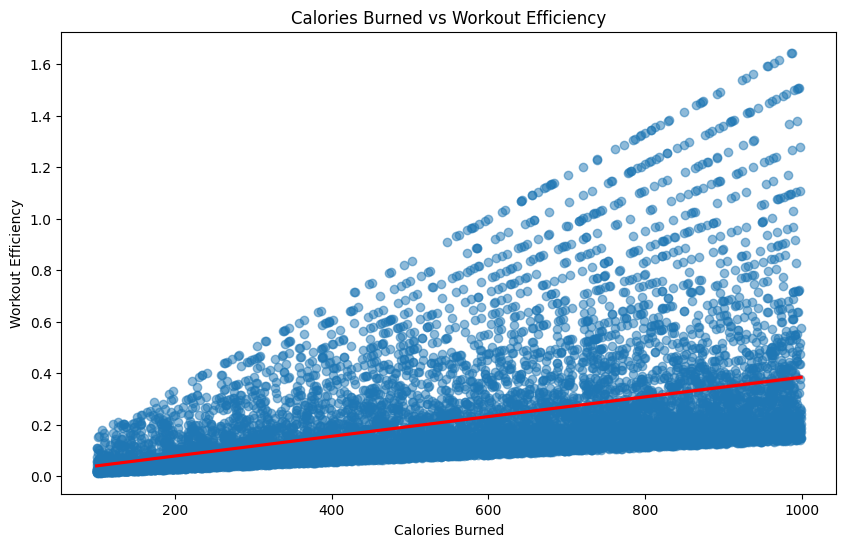

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Calories Burned', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Calories Burned vs Workout Efficiency')
plt.xlabel('Calories Burned')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: if `Calories Burned` increase `Workout Efficiency` increase too

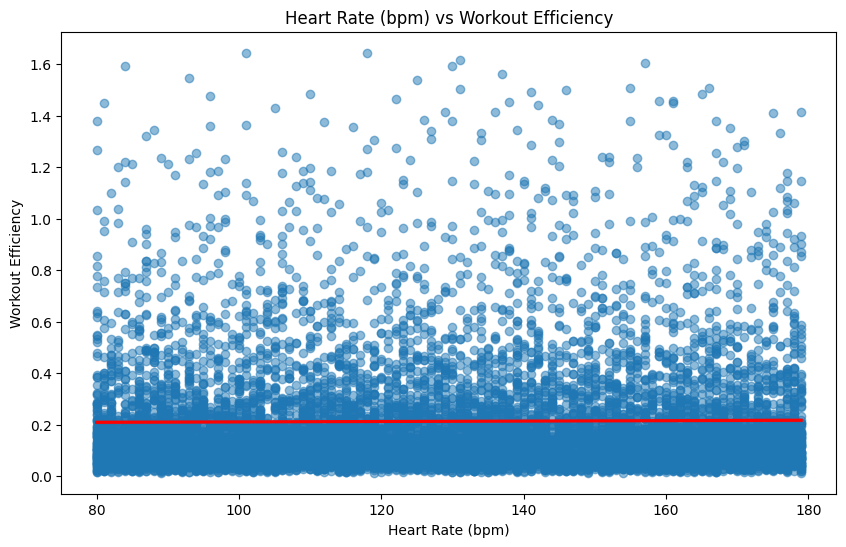

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Heart Rate (bpm)', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Heart Rate (bpm) vs Workout Efficiency')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Heart Rate (bpm)` increase `Workout Efficiency` not increase

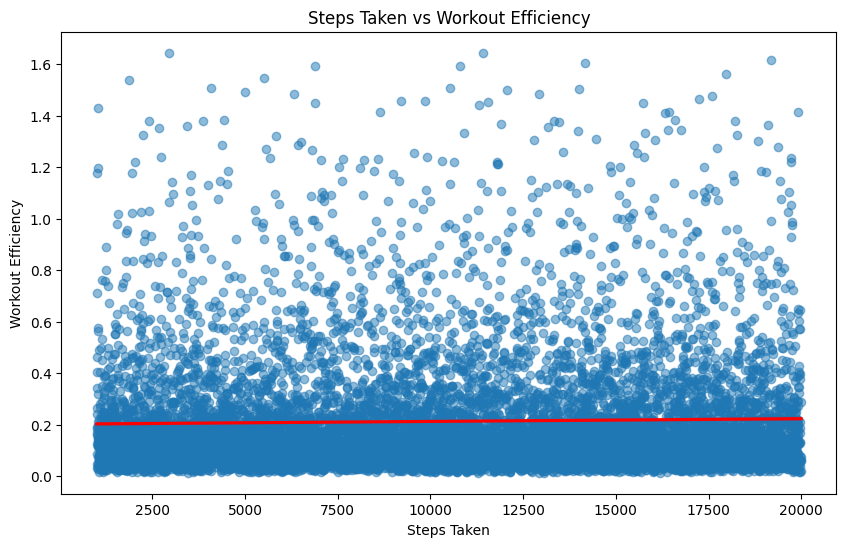

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Steps Taken', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Steps Taken vs Workout Efficiency')
plt.xlabel('Steps Taken')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Step Taken` increase but, `Workout Efficiency` no increase

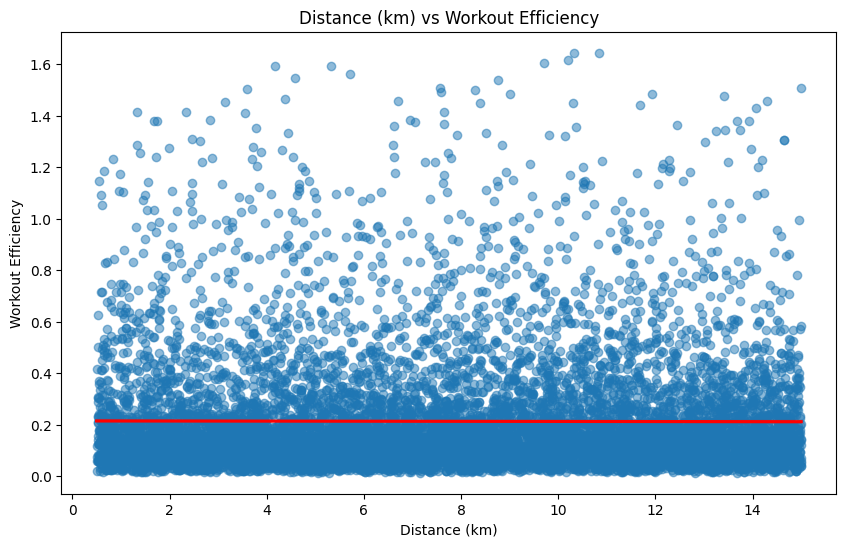

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Distance (km)', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Distance (km) vs Workout Efficiency')
plt.xlabel('Distance (km)')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Distance (km)` increase, but `Workout Efficiency` no increase

C:\Users\amris\AppData\Local\Temp\ipykernel_22224\3381059451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Workout Intensity', y='Workout Efficiency', data=df, palette='Set2')


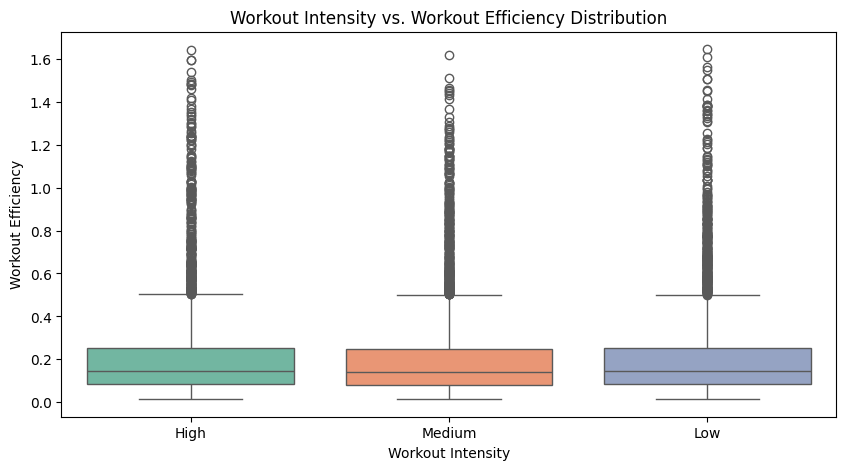

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Workout Intensity', y='Workout Efficiency', data=df, palette='Set2')
plt.xlabel('Workout Intensity')
plt.ylabel('Workout Efficiency')
plt.title('Workout Intensity vs. Workout Efficiency Distribution')
plt.show()

Insight: All `Workout Intensity` have outliers

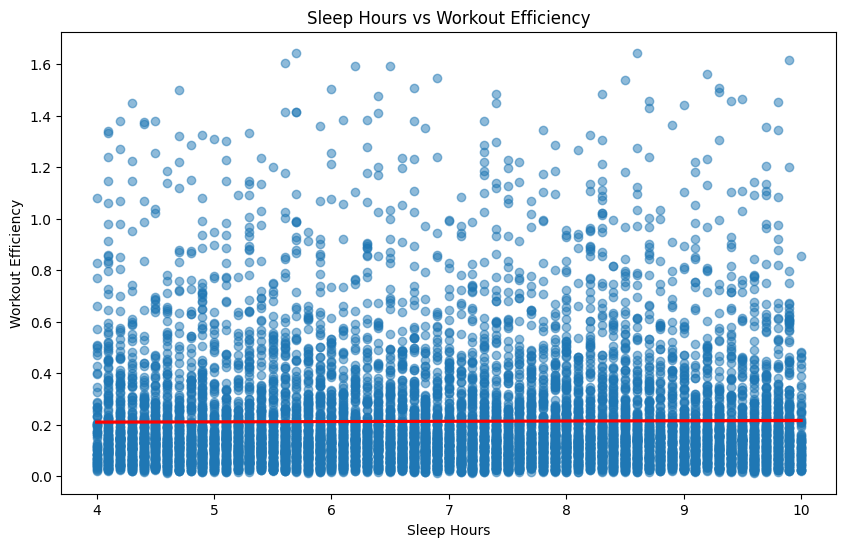

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Sleep Hours', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sleep Hours vs Workout Efficiency')
plt.xlabel('Sleep Hours')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Sleep Hours` increase not equal `Workout Efficiency` increase

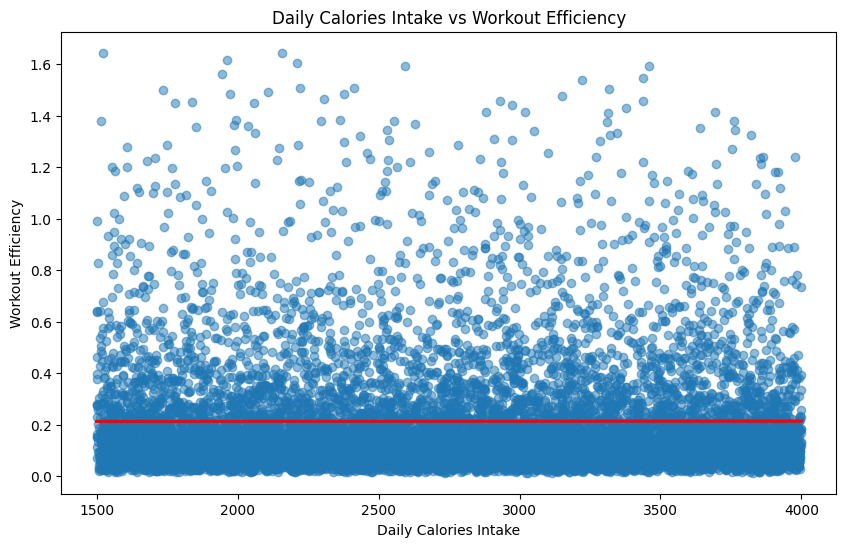

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily Calories Intake', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Daily Calories Intake vs Workout Efficiency')
plt.xlabel('Daily Calories Intake')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Sleep Hours` increase not equal `Daily Calories Intake` increase

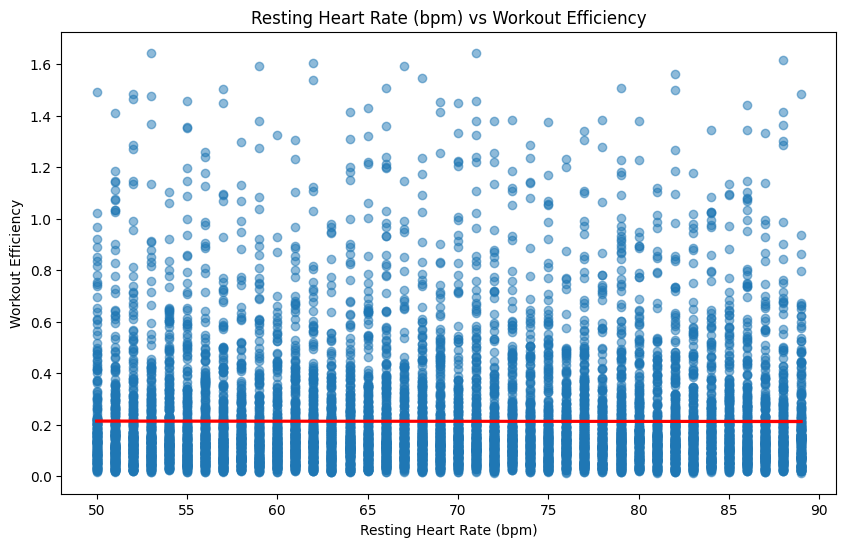

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Resting Heart Rate (bpm)', y='Workout Efficiency', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Resting Heart Rate (bpm) vs Workout Efficiency')
plt.xlabel('Resting Heart Rate (bpm)')
plt.ylabel('Workout Efficiency')
plt.show()

Insight: `Sleep Hours` increase not equal `Resting Heart (bpm)` increase

C:\Users\amris\AppData\Local\Temp\ipykernel_22224\4238146651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Mood Before Workout', y='Workout Efficiency', data=df, palette='Set2')


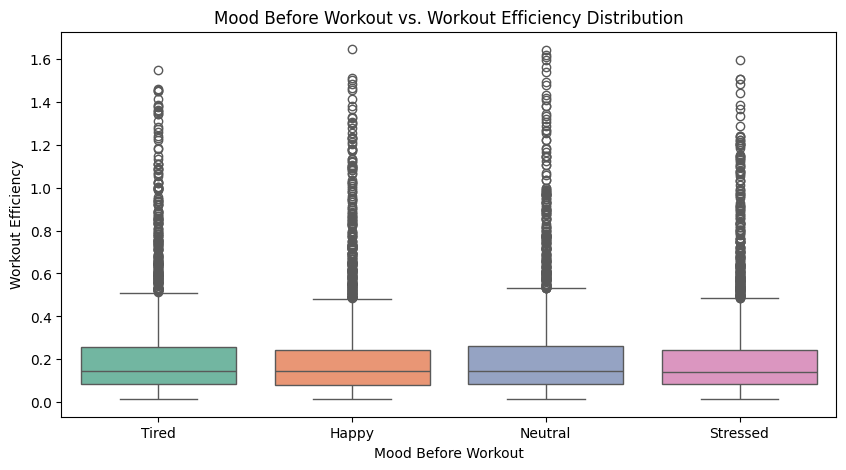

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Mood Before Workout', y='Workout Efficiency', data=df, palette='Set2')
plt.xlabel('Mood Before Workout')
plt.ylabel('Workout Efficiency')
plt.title('Mood Before Workout vs. Workout Efficiency Distribution')
plt.show()

Insight: All `Mood Before Workout` have outliers

C:\Users\amris\AppData\Local\Temp\ipykernel_22224\2497408749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Mood After Workout', y='Workout Efficiency', data=df, palette='Set2')


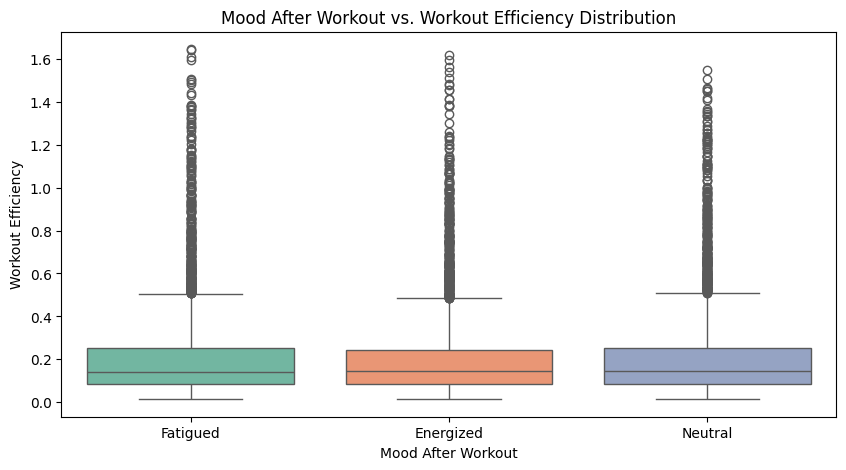

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Mood After Workout', y='Workout Efficiency', data=df, palette='Set2')
plt.xlabel('Mood After Workout')
plt.ylabel('Workout Efficiency')
plt.title('Mood After Workout vs. Workout Efficiency Distribution')
plt.show()

Insight: All `Mood After Workout` have outliers

## Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that enhance the performance of machine learning models. It involves creating, selecting, and modifying features to improve predictive accuracy and make the data more suitable for analysis.

In [30]:
df['Margin Calories Burned'] = df['Calories Burned'] - df['Daily Calories Intake']
df['Margin Heart Rate'] = df['Heart Rate (bpm)'] - df['Resting Heart Rate (bpm)']
df['Ratio Calories Burned'] = df['Calories Burned'] / df['Daily Calories Intake']
df['Ratio Heart Rate'] = df['Heart Rate (bpm)'] / df['Resting Heart Rate (bpm)']
df['Ratio Duration Calories Burned'] = df['Workout Duration (mins)'] / df['Ratio Calories Burned']
df['Ration WD Sleep Hours'] = df['Workout Duration (mins)'] / df['Sleep Hours']

## Label Encoder

Label Encoding is a technique used to convert categorical variables into numerical values so that machine learning models can process them efficiently. It assigns a unique integer to each category in a column, making it useful for algorithms that require numerical inputs

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply encoding
    label_encoders[col] = le  

In [ ]:
# Identify categorical columns
#categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
#label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
#for col in categorical_cols:
#    df[col] = label_encoder.fit_transform(df[col])

## K-Fold Cross Validation

K-Fold Cross Validation is a robust technique used to evaluate the performance of machine learning models by splitting the dataset into K equal parts (folds) and training the model multiple times on different subsets of data

In [34]:
df_clean = df.drop(['User ID', 'Water Intake (liters)', 'VO2 Max', 'Body Fat (%)'], axis=1)

In [35]:
x = df_clean.drop('Workout Efficiency', axis=1)
y = df_clean['Workout Efficiency']

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

## Modeling

Modeling in Machine Learning is the process of building and training a mathematical representation of patterns in data to make predictions or decisions. A machine learning model learns from historical data (training data) and applies that knowledge to new, unseen data to generate predictions. we use `GradientBoostingRegressor`, `AdaBoostRegressor` and `RandomForestRegressor`

In [37]:
gb_params = {
    'n_estimators': [200, 300],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=5)
gb_grid.fit(x_train, y_train)
gb_best = gb_grid.best_estimator_

# AdaBoostRegressor Hyperparameter Tuning
ada_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.001, 0.01, 0.1]
}
ada_grid = GridSearchCV(AdaBoostRegressor(), ada_params, scoring='neg_mean_absolute_error', cv=5)
ada_grid.fit(x_train, y_train)
ada_best = ada_grid.best_estimator_

# RandomForestRegressor Hyperparameter Tuning
rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [3, 6]
}
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, scoring='neg_mean_absolute_error', cv=5)
rf_grid.fit(x_train, y_train)
rf_best = rf_grid.best_estimator_

Feature Importance helps identify which input variables (features) have the most impact on a model’s predictions. Understanding feature importance is crucial for improving model performance, interpretability, and decision-making

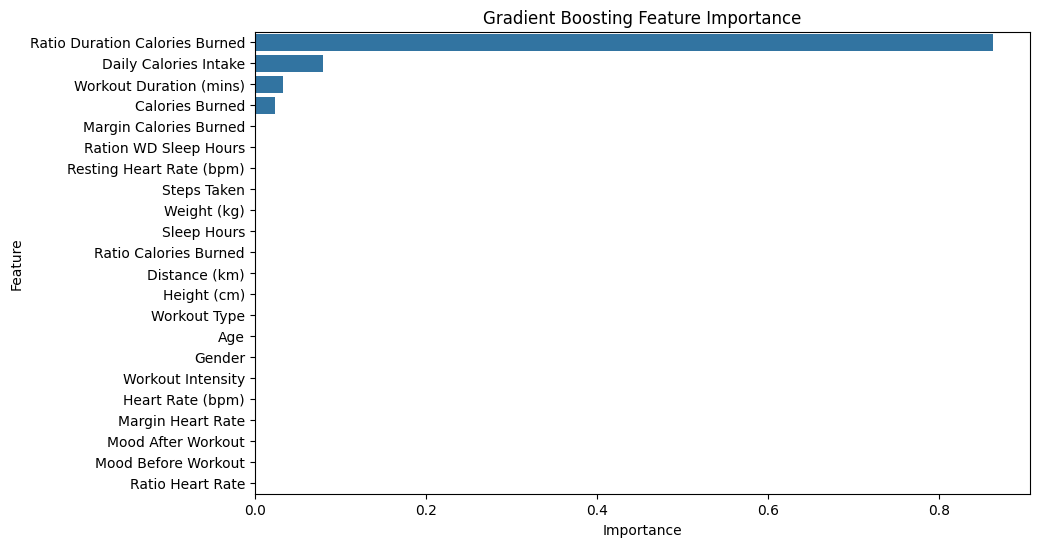

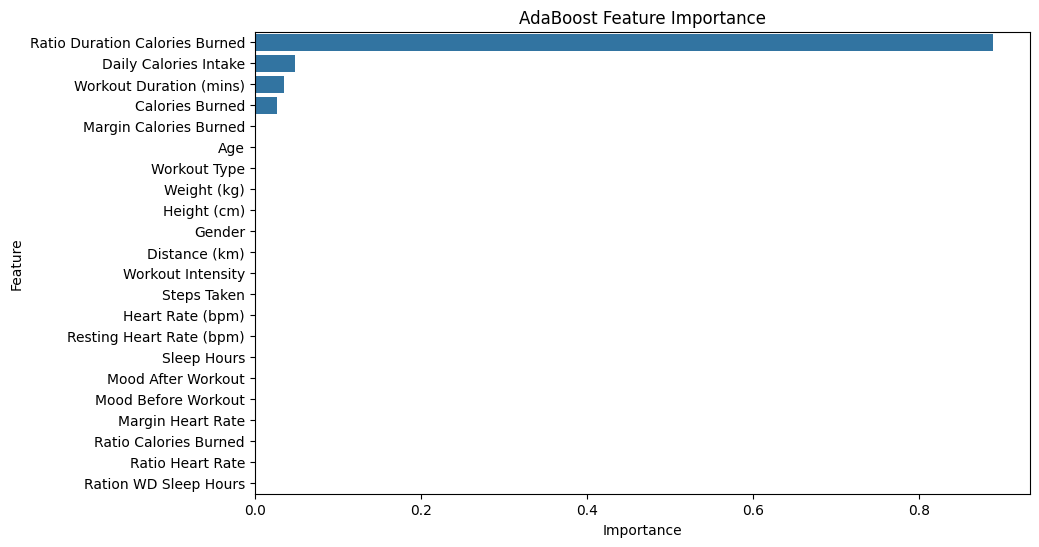

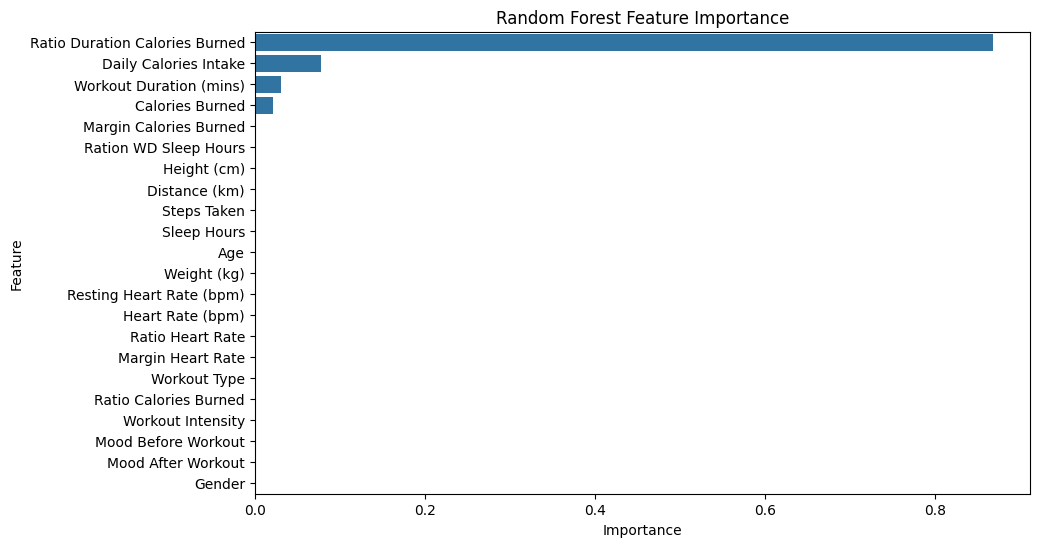

In [33]:
# Gradient Boosting Regressor
gb_feature_importances = gb_best.feature_importances_

# AdaBoost Regressor
ada_feature_importances = ada_best.feature_importances_

# Random Forest Regressor
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances})

# Sort by importance
gb_importance_df = gb_importance_df.sort_values('Importance', ascending=False)
ada_importance_df = ada_importance_df.sort_values('Importance', ascending=False)
rf_importance_df = rf_importance_df.sort_values('Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ada_importance_df)
plt.title('AdaBoost Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Insight: `GradientBoostingRegressor` , `AdaBoostRegressor` and `RandomForestRegressor` have highest feature importance is `Ratio Duration Calories Burned`.

In [34]:
# VotingRegressor with best parameters
voting_regressor = VotingRegressor(estimators=[
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)])

voting_regressor.fit(x_train, y_train)
y_pred_v = voting_regressor.predict(x_val)

mape_error_vh = np.mean(np.abs((y_val - y_pred_v) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_vh:.2f}%')

Mean Absolute Percentage Error (MAPE): 14.19%


Insight: Ensemble voting with three model machine learning have result MAPE 14.19%

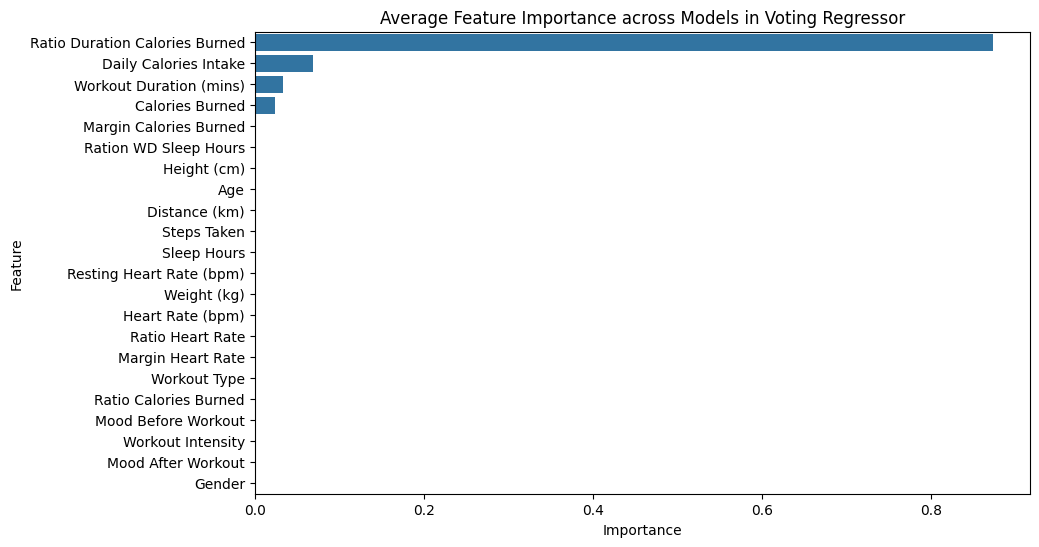

In [44]:
# Access feature importances from the base learners in the voting regressor
gb_feature_importances = voting_regressor.named_estimators_['gb'].feature_importances_
ada_feature_importances = voting_regressor.named_estimators_['ada'].feature_importances_
rf_feature_importances = voting_regressor.named_estimators_['rf'].feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances, 'Model': 'Gradient Boosting'})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances, 'Model': 'AdaBoost'})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df = pd.concat([gb_importance_df, ada_importance_df, rf_importance_df])

# Calculate average importance across models
average_importance = importance_df.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance = average_importance.sort_values('Importance', ascending=False)

# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance)
plt.title('Average Feature Importance across Models in Voting Regressor')
plt.show()

Insight: Average ensemble voting have feature importance highest is `Ratio Duration Calories Burned`

In [38]:
base_learners = [
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)]

# Final estimator hyperparameter tuning
ridge_params = {'final_estimator__alpha': [0.1, 1.0, 10.0]}
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=Ridge())

stacking_grid = GridSearchCV(stacking_regressor, ridge_params, scoring='neg_mean_absolute_error', cv=3)
stacking_grid.fit(x_train, y_train)

# Best model
stacking_best = stacking_grid.best_estimator_

# Predict and evaluate
y_pred_sh = stacking_best.predict(x_val)
mape_error_sh = np.mean(np.abs((y_val - y_pred_sh) / y_val)) * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape_error_sh:.2f}%')

Mean Absolute Percentage Error (MAPE): 1.52%


Insight: Ensemble stacking with three model machine learning and final estimator use ridge have result MAPE 1.52%, increase than ensemble voting

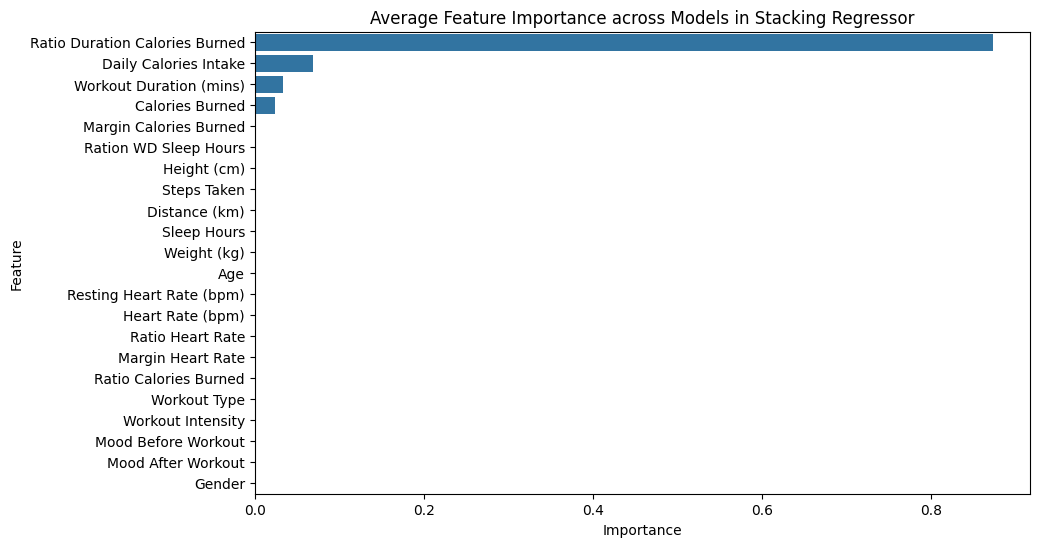

In [43]:
# Access feature importances from the base learners in the stacking model
gb_feature_importances = stacking_best.named_estimators_['gb'].feature_importances_
ada_feature_importances = stacking_best.named_estimators_['ada'].feature_importances_
rf_feature_importances = stacking_best.named_estimators_['rf'].feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances, 'Model': 'Gradient Boosting'})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances, 'Model': 'AdaBoost'})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df = pd.concat([gb_importance_df, ada_importance_df, rf_importance_df])

# Calculate average importance across models
average_importance = importance_df.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance = average_importance.sort_values('Importance', ascending=False)

# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance)
plt.title('Average Feature Importance across Models in Stacking Regressor')
plt.show()

Insight: Same as ensemble voting, we have feature importance if use ensemble stacking is `Ratio Duration Calories Burned` highest in average

## Conclussion

`Workout Duration (mins)` and `Calories Burned` have strong correlation with `Workout Efficiency` in heatmap, but if we use ensemble stacking `Dailiy Calories Intake` have more important than 2 variable. and highest feature importance is `Ratio Duration Calories Burned`. Ensemble stacking is result better than ensemble voting with MAPE 1.52%

## Reference

1. https://www.kaggle.com/datasets/adilshamim8/workout-and-fitness-tracker-data?resource=download

2. https://www.analyticsvidhya.com/

3. https://xbe.at/

4. https://scikit-learn.org/stable/